# <center>  Détecter de faux billets avec python

Construire un algorithme qui, à partir des caractéristiques géométriques d’un billet, serait capable de définir si ce dernier est un vrai ou un faux billet.

Nous avons à notre disposition six données géométriques pour chaque billet. L’algorithme devra donc être capable de prendre en entrée un fichier contenant les dimensions de plusieurs billets, et de déterminer le type de chacun d’entre eux, à partir des seules dimensions.

Nous allons mettre en concurrence deux méthodes de prédiction :

● une régression logistique classique

● un k-means, duquel seront utilisés les centroïdes pour réaliser la prédiction

Cet algorithme se devra d’être naturellement le plus performant possible pour identifier un maximum de faux billets au sein de la masse de billets analysés chaque jour.

In [1]:
import warnings
warnings.simplefilter(action='ignore')

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn as sk
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import bartlett
from scipy.stats import shapiro
from statsmodels.formula.api import ols
from scipy.stats import shapiro
%matplotlib inline
from functions import *

# Paramétrage de l'environnement

In [2]:

sns.set_theme(context='notebook', style='darkgrid', palette='Set2')


# Importation données & aperçu

In [3]:
data = pd.read_csv('Data_billets.csv', sep=";")

UNIQUE:
is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64

----------------------
COUNT:
is_genuine      1500
diagonal        1500
height_left     1500
height_right    1500
margin_low      1463
margin_up       1500
length          1500
dtype: int64

----------------------
NULL:
is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

----------------------
Taux de valeurs manquantes (%):
is_genuine      0.00
diagonal        0.00
height_left     0.00
height_right    0.00
margin_low      2.47
margin_up       0.00
length          0.00
dtype: float64

----------------------
DUPLICATED:
0

----------------------


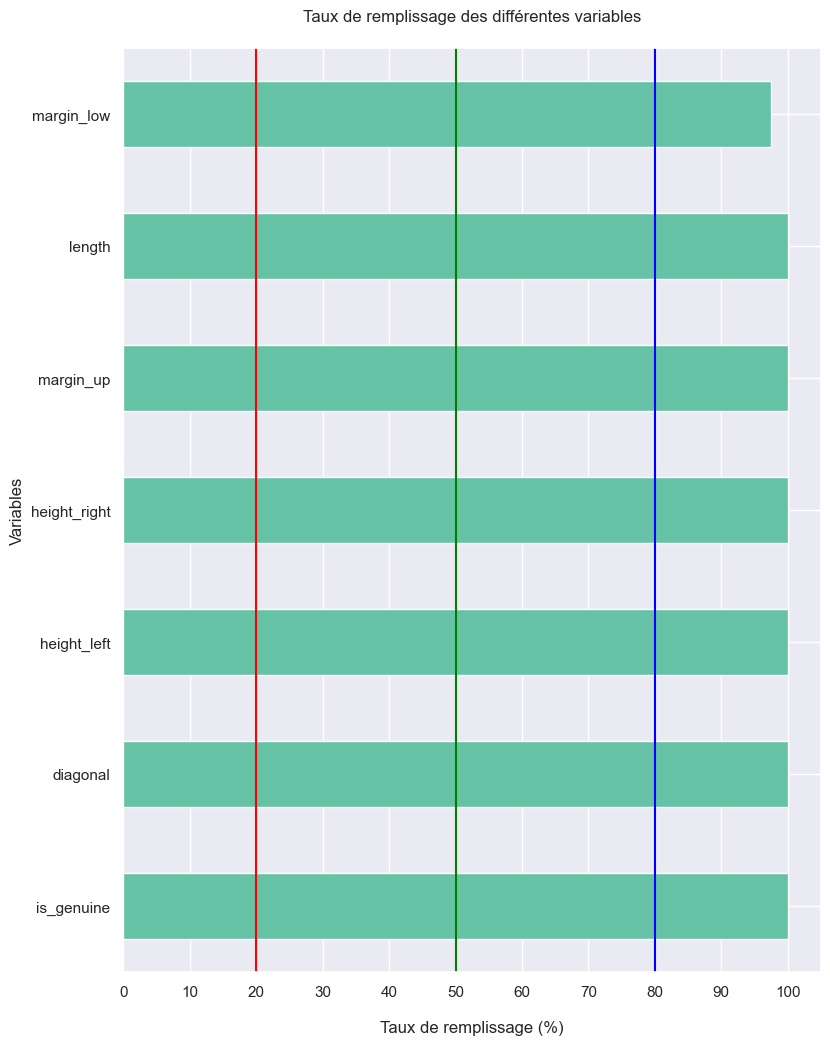

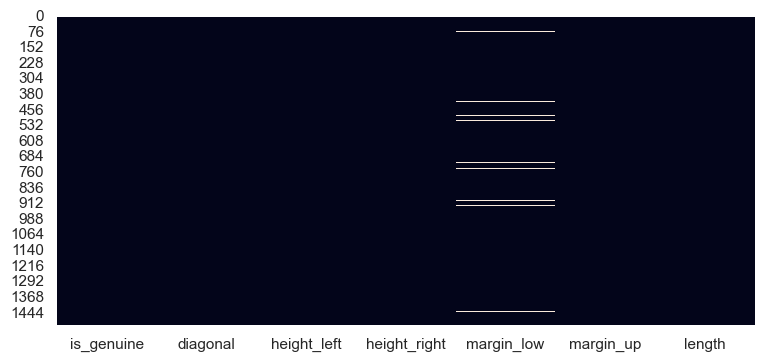

In [4]:
# Vérification du df
verif(data)
isna(data)

In [5]:
data.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

# Imputation des données pour la variable margin_low

Utilisation de la regression linéaire pour determiner les valeurs manquantes

https://www.kaggle.com/code/shashankasubrahmanya/missing-data-imputation-using-regression/notebook

https://statisticsglobe.com/regression-imputation-stochastic-vs-deterministic/

In [6]:
data_nan = data[data["margin_low"].isnull()]
data_nan

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [7]:
missing_column = ["margin_low"]

In [8]:
""" La fonction random_imputation remplace les valeurs manquantes par des valeurs observées aléatoires de la variable. 
     La méthode est répétée pour toutes les variables contenant des valeurs manquantes, après quoi elles servent de paramètres 
     dans le modèle de régression pour estimer d'autres valeurs de variables."""

def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [9]:
for feature in missing_column:
    data[feature + '_imp'] = data[feature]
    data = random_imputation(data, feature)

In [10]:
from sklearn import linear_model

deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_column])

for feature in missing_column:
        
    deter_data["Det" + feature] = data[feature + "_imp"]
    parameters = list(set(data.columns) - set(missing_column) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = data[parameters], y = data[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[data[feature].isnull(), "Det" + feature] = model.predict(data[parameters])[data[feature].isnull()]

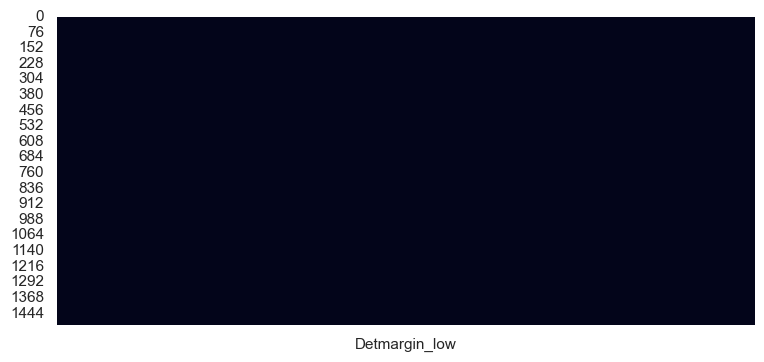

In [11]:
isna(deter_data)

Test de bartlett qui permet de tester si les variances sont significativement différentes ou non avec :<br>
<br>
H0 : Les variances de chaque groupe sont égales <br>
H1 : Les variances de chaque groupe ne sont pas toutes égales<br>
https://www.statology.org/bartletts-test-python/

In [12]:
bartlett(data.margin_low,data.margin_low_imp)
print(bartlett(data.margin_low,data.margin_low_imp),  "\n\nPvalue > 5% H0 validé")

BartlettResult(statistic=0.029485306041740367, pvalue=0.8636632757359394) 

Pvalue > 5% H0 validé


On utilise le test de Shapiro-Wilk pour tester la normalité des résidus où :<br>
<br>
H0 : Les résidus suivent une loi normale si p-value<br>
H1 : Les résidus ne suivent pas une loi normale si p-value <br>
https://www.statology.org/shapiro-wilk-test-python/

In [13]:
model = ols('margin_low ~ margin_low_imp  ', data=data).fit()
print()

print (shapiro(model.resid), "\n\nPvalue < 5% H0 est rejeté")


ShapiroResult(statistic=0.8779928684234619, pvalue=2.1767278354805127e-32) 

Pvalue < 5% H0 est rejeté


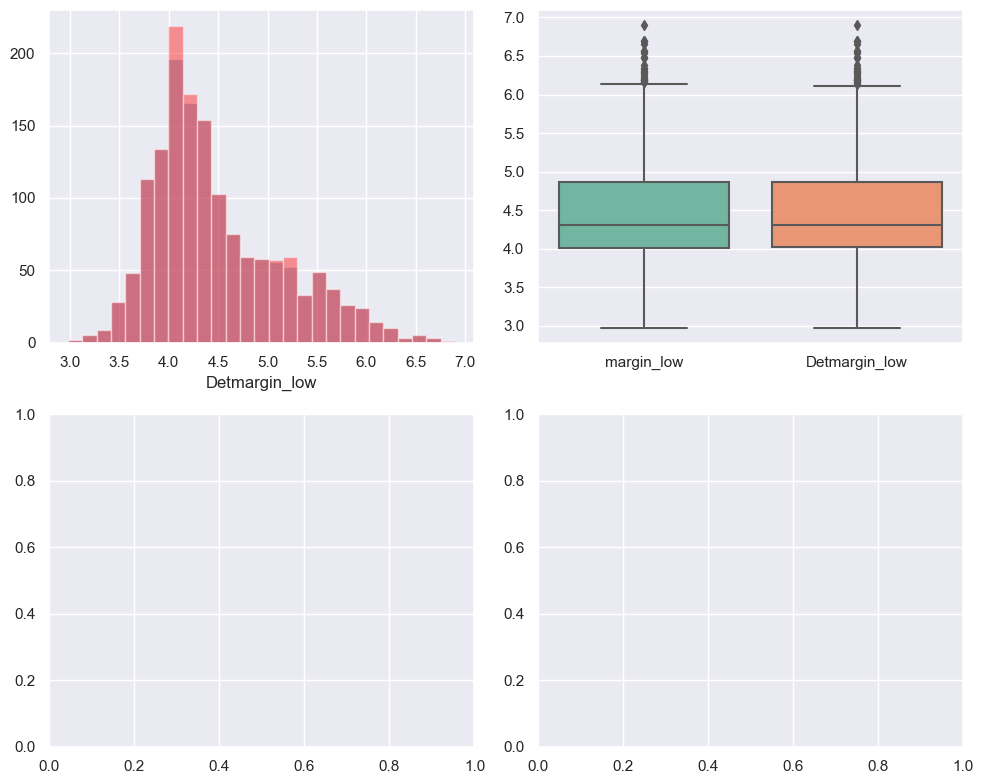

In [14]:
# vérification de l'impact de l'implémentation des données manquante

sns.set()
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(10, 8)
sns.set_palette('Set2')



for index, variable in enumerate(["margin_low"]):
    sns.distplot(data[variable].dropna(), kde = False, ax = axes[index, 0])
    sns.distplot(deter_data["Det" + variable], kde = False, ax = axes[index, 0], color = 'red')
    
    
    sns.boxplot(data = pd.concat([data[variable], deter_data["Det" + variable]], axis = 1),
                ax = axes[index, 1])
    
plt.tight_layout()

In [15]:
pd.concat([data[['margin_low']], deter_data[['Detmargin_low']]], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
margin_low,1463.0,4.485967,0.663813,2.98,4.0150,4.31,4.87,6.9
Detmargin_low,1500.0,4.482834,0.659751,2.98,4.0275,4.31,4.87,6.9


In [16]:
# suppression de l'ancienne variable et rename de la variable implémentée

data.drop('margin_low', axis=1, inplace=True)
data.rename(columns={'margin_low_imp': 'margin_low'}, inplace = True)
data = data[['is_genuine','diagonal','height_left','height_right','margin_up','margin_low','length']]

In [17]:
data

,is_genuine,diagonal,height_left,height_right,margin_up,margin_low,length
0,True,171.81,104.86,104.95,2.89,4.52,112.83
1,True,171.46,103.36,103.66,2.99,3.77,113.09
2,True,172.69,104.48,103.50,2.94,4.40,113.16
3,True,171.36,103.91,103.94,3.01,3.62,113.51
4,True,171.73,104.28,103.46,3.48,4.04,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,3.09,4.42,111.28
1496,False,172.19,104.63,104.44,3.37,5.27,110.97
1497,False,171.80,104.01,104.12,3.36,5.51,111.95
1498,False,172.06,104.28,104.06,3.46,5.17,112.25


In [18]:
description = data.groupby('is_genuine').describe().T
description

is_genuine               False         True
diagonal     count  500.000000  1000.000000
             mean   171.901160   171.987080
             std      0.306861     0.300441
             min    171.040000   171.040000
             25%    171.690000   171.790000
             50%    171.910000   171.990000
             75%    172.092500   172.200000
             max    173.010000   172.920000
height_left  count  500.000000  1000.000000
             mean   104.190340   103.949130
             std      0.223758     0.300231
             min    103.510000   103.140000
             25%    104.040000   103.740000
             50%    104.180000   103.950000
             75%    104.332500   104.140000
             max    104.880000   104.860000
height_right count  500.000000  1000.000000
             mean   104.143620   103.808650
             std      0.270878     0.291570
             min    103.430000   102.820000
             25%    103.950000   103.610000
             50%    104.160000   103.810000
             75%    104.320000   104.000000
             max    104.950000   104.950000
margin_up    count  500.000000  1000.000000
             mean     3.350160     3.052130
             std      0.180498     0.186340
             min      2.920000     2.270000
             25%      3.220000     2.930000
             50%      3.350000     3.050000
             75%      3.472500     3.180000
             max      3.910000     3.740000
margin_low   count  500.000000  1000.000000
             mean     5.202740     4.119220
             std      0.566305     0.321607
             min      3.490000     2.980000
             25%      4.820000     3.910000
             50%      5.180000     4.120000
             75%      5.590000     4.340000
             max      6.900000     5.270000
length       count  500.000000  1000.000000
             mean   111.630640   113.202430
             std      0.615543     0.359552
             min    109.490000   111.760000
             25%    111.200000   112.950000
             50%    111.630000   113.205000
             75%    112.030000   113.460000
             max    113.850000   114.440000

# Profil des billets Vrai et Faux

## Vrai billet



In [19]:
print('Profil du vrai billet : ')

data.loc[data['is_genuine'].isin([True]),:].mean()

Profil du vrai billet : 


is_genuine        1.00000
diagonal        171.98708
height_left     103.94913
height_right    103.80865
margin_up         3.05213
margin_low        4.11922
length          113.20243
dtype: float64

## Faux billet

In [20]:
print('Profil du faux billet : ')

data.loc[data['is_genuine'].isin([False]),:].mean()

Profil du faux billet : 


is_genuine        0.00000
diagonal        171.90116
height_left     104.19034
height_right    104.14362
margin_up         3.35016
margin_low        5.20274
length          111.63064
dtype: float64

## analyse

- Pas de valeurs aberrantes 
- Répartition conforme au cahier des charges ( 1000 vrais et 500 faux, 7 variables )
- ---> 37 valeurs manquantes dans le jeu de données pour la variable margin_low 1463 valeurs sur 1500 ( répartition des billets 8 dans faux et 29 dans vrai)
- Valeurs manquante implémentée avec la regression linéaire
- Valeurs supérieures sur la moyenne des dimensions sur les faux billets sur 4 des 6 variables

représenter ces différences avec une visualisation

## Création de df distinct pour les billet vrais et faux

In [21]:
True_in_data = data.loc[data['is_genuine'].isin([True]),:]

In [22]:
True_in_data.shape

(1000, 7)

In [23]:
True_in_data.describe()

,diagonal,height_left,height_right,margin_up,margin_low,length
count,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000
mean,171.987080,103.949130,103.80865,3.05213,4.119220,113.202430
std,0.300441,0.300231,0.29157,0.18634,0.321607,0.359552
min,171.040000,103.140000,102.82000,2.27000,2.980000,111.760000
25%,171.790000,103.740000,103.61000,2.93000,3.910000,112.950000
50%,171.990000,103.950000,103.81000,3.05000,4.120000,113.205000
75%,172.200000,104.140000,104.00000,3.18000,4.340000,113.460000
max,172.920000,104.860000,104.95000,3.74000,5.270000,114.440000


In [24]:
False_in_data = data.loc[data['is_genuine'].isin([False]),:]

In [25]:
False_in_data.shape

(500, 7)

In [26]:
False_in_data.describe()

,diagonal,height_left,height_right,margin_up,margin_low,length
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,171.901160,104.190340,104.143620,3.350160,5.202740,111.630640
std,0.306861,0.223758,0.270878,0.180498,0.566305,0.615543
min,171.040000,103.510000,103.430000,2.920000,3.490000,109.490000
25%,171.690000,104.040000,103.950000,3.220000,4.820000,111.200000
50%,171.910000,104.180000,104.160000,3.350000,5.180000,111.630000
75%,172.092500,104.332500,104.320000,3.472500,5.590000,112.030000
max,173.010000,104.880000,104.950000,3.910000,6.900000,113.850000


In [27]:
data_grouped_is_genuine = data.groupby(by='is_genuine').mean()
data_grouped_is_genuine

,diagonal,height_left,height_right,margin_up,margin_low,length
is_genuine,,,,,,
False,171.90116,104.19034,104.14362,3.35016,5.20274,111.63064
True,171.98708,103.94913,103.80865,3.05213,4.11922,113.20243


# Analyse descriptive des billets

N.B (cahier des charges): Dans un premier temps, nous souhaitons avoir une analyse descriptive des données, 
 notamment la répartition des dimensions des billets, le nombre de vrais / faux billets, etc.

## Distribution des valeurs selon les variables et la catégorie de billet

https://datavizpyr.com/violinplot-vs-boxplot-when-violinplot-can-be-more-useful/

Dans notre cas, boxplot convient, l'utilisation ici de violinplot est pour l'effet graphique

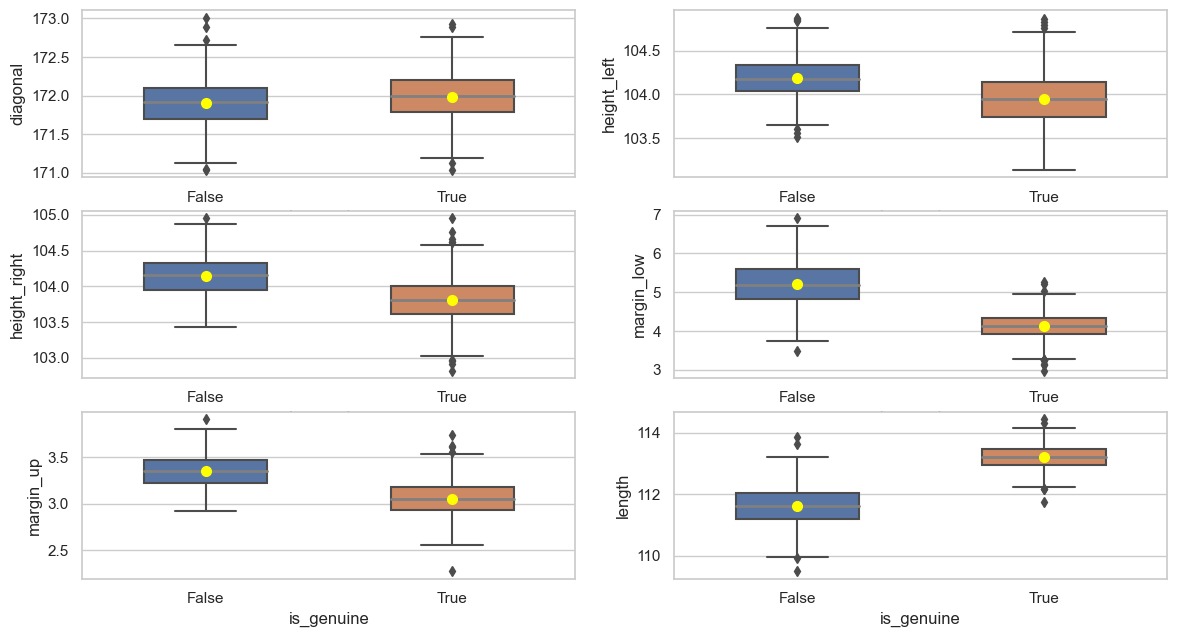

In [28]:
#Comparaison visuelle par Boxplot

sns.set_palette('Set2')
medianprops = dict(linewidth=2, color='grey')
meanprops={"marker":"o",
                       "markerfacecolor":"yellow", 
                       "markeredgecolor":"yellow",
                      "markersize":"7"}

plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")
plt.subplot(421)
sns.boxplot(data=data, x='is_genuine', y='diagonal',
            medianprops = medianprops, showmeans=True, meanprops=meanprops, width = .5)

plt.subplot(422)
sns.boxplot(data=data, x='is_genuine', y='height_left',
            medianprops = medianprops, showmeans=True, meanprops=meanprops, width = .5)
plt.subplot(423)
sns.boxplot(data=data, x='is_genuine', y='height_right',
            medianprops = medianprops, showmeans=True, meanprops=meanprops, width = .5)
plt.subplot(424)
sns.boxplot(data=data, x='is_genuine', y='margin_low',
            medianprops = medianprops, showmeans=True, meanprops=meanprops, width = .5)
plt.subplot(425)
sns.boxplot(data=data, x='is_genuine', y='margin_up',
            medianprops = medianprops, showmeans=True, meanprops=meanprops, width = .5)
plt.subplot(426)
sns.boxplot(data=data, x='is_genuine', y='length',
            medianprops = medianprops, showmeans=True, meanprops=meanprops, width = .5)
plt.show();

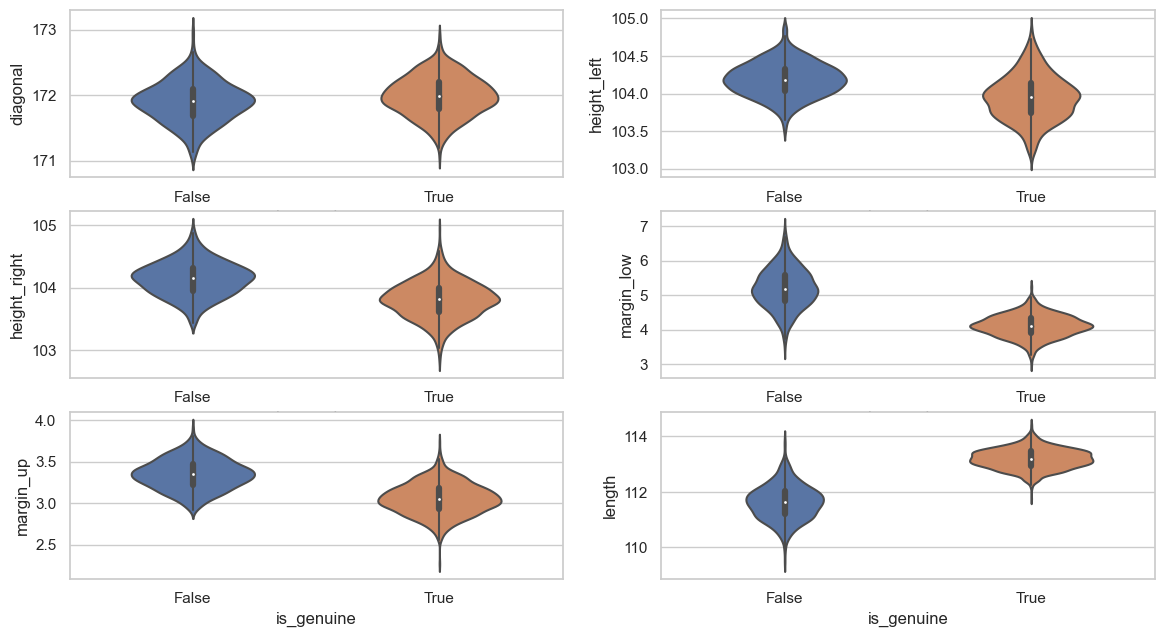

In [29]:
#Comparaison visuelle par Boxplot

medianprops = dict(linewidth=2, color='grey')
meanprops={"marker":"o",
                       "markerfacecolor":"yellow", 
                       "markeredgecolor":"yellow",
                      "markersize":"7"}

plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")
plt.subplot(421)
sns.violinplot(data=data, x='is_genuine', y='diagonal',
            medianprops = medianprops, showmeans=True, meanprops=meanprops, width = .5)

plt.subplot(422)
sns.violinplot(data=data, x='is_genuine', y='height_left',
            medianprops = medianprops, showmeans=True, meanprops=meanprops, width = .5)
plt.subplot(423)
sns.violinplot(data=data, x='is_genuine', y='height_right',
            medianprops = medianprops, showmeans=True, meanprops=meanprops, width = .5)
plt.subplot(424)
sns.violinplot(data=data, x='is_genuine', y='margin_low',
            medianprops = medianprops, showmeans=True, meanprops=meanprops, width = .5)
plt.subplot(425)
sns.violinplot(data=data, x='is_genuine', y='margin_up',
            medianprops = medianprops, showmeans=True, meanprops=meanprops, width = .5)
plt.subplot(426)
sns.violinplot(data=data, x='is_genuine', y='length',
            medianprops = medianprops, showmeans=True, meanprops=meanprops, width = .5)
plt.show();

## Corrélation entre les variables

Une matrice de corrélation est utilisée pour évaluer la dépendence entre plusieurs variables en même temps.<br>
Le résultat est une table contenant les coefficients de corrélation entre chaque variable et les autres.<br>
Par defaut: Pearson

pour l'interpretation des resultats : <br>

    -1: A full negative correlation. Meaning if variable goes up, the other variable goes down and they are fully correlated
    0: No correlation at all. Meaning that the two variables are not dependent at all. If one goes up, you cannot predict with any probability what will happen to the other
    1: A full correlation. Meaning if the one variable goes up, so will the other

In [30]:
# création d'une fonction pour générer une matrice de corrélation

def correlation_matrix(df):
    mask=np.triu(np.ones_like(df.corr(),dtype=bool))
    sns.heatmap(df.corr(), mask=mask, center= 0, cmap='RdBu',
    linewidths=1,
    annot=True, fmt = ".2f", vmin=-1, vmax=1)


In [31]:
df_corr = data.corr()
df_corr

,is_genuine,diagonal,height_left,height_right,margin_up,margin_low,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.606262,-0.773137,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.055649,-0.108563,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.246522,0.297825,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.307005,0.383768,-0.401751
margin_up,-0.606262,-0.055649,0.246522,0.307005,1.000000,0.424269,-0.520575
margin_low,-0.773137,-0.108563,0.297825,0.383768,0.424269,1.000000,-0.655748
length,0.849285,0.097587,-0.320863,-0.401751,-0.520575,-0.655748,1.000000


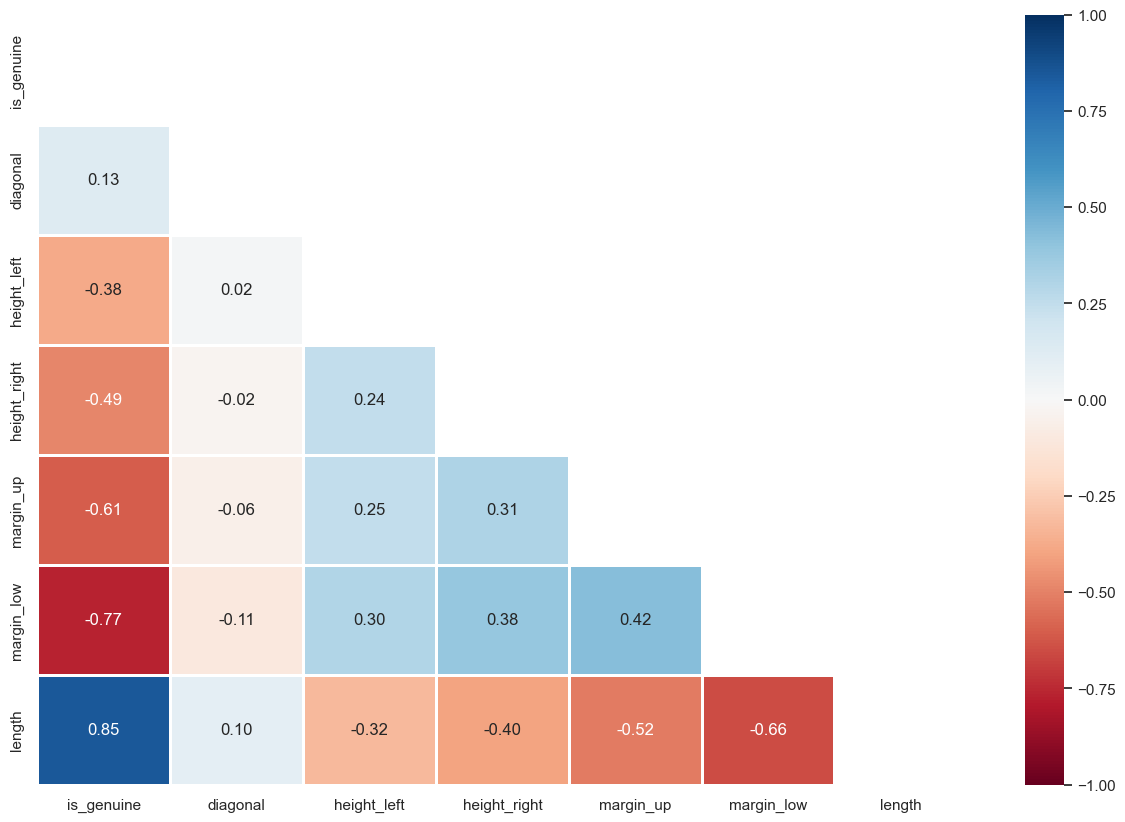

In [32]:
# dimension du graphique
f, ax = plt.subplots(figsize=(15, 10))

correlation_matrix(data)
save_fig('correlation')

Les variables **"length"** et **"margin_low"** sont les variables **les plus corrélées à la variable "is_genuine"**. <br>
    --> ces 2 variables seront donc les plus importantes lors de la détection de faux billets.<br>

   - très faible corrélation entre "margin_up" et "diagonal".
   -forte corrélation positive est constatée entre "height_right" et "height_left" : les deux variables varient dans le même sens.
   -corrélation négative existe entre "margin_low" et "length" : lorsqu'une des variables augmente, l'autre diminue.

Il existe bien une différence significative entre les données des vrais et des faux billets.<br>



## Visualisation de la dispersion des variables prises 2 à 2

 https://towardsdatascience.com/pair-plot-and-pairgrid-in-details-f782975032ea

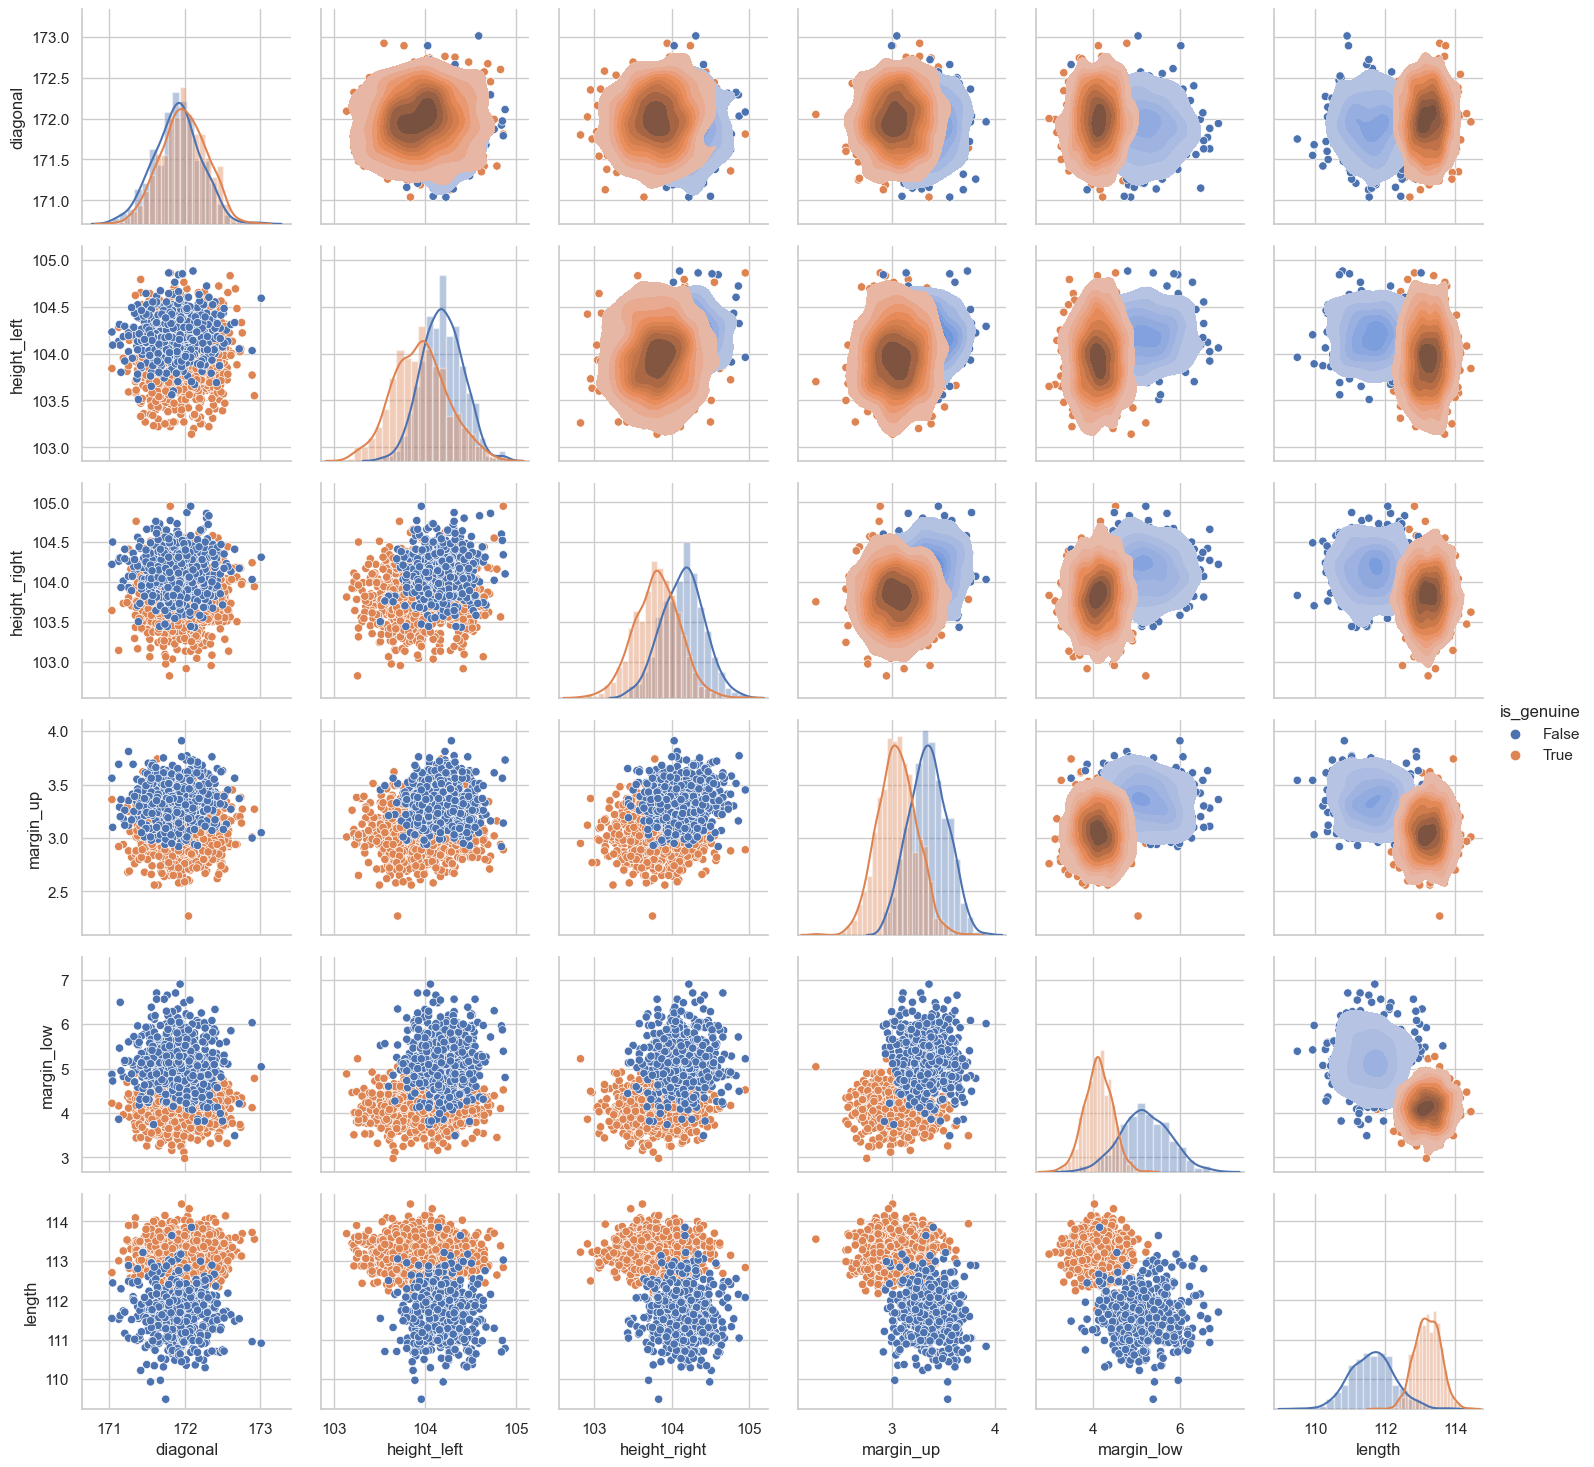

In [33]:
visu = sns.PairGrid(data, hue="is_genuine", corner= False)
visu.map_diag(sns.distplot)
visu.map_offdiag(sns.scatterplot)
visu.map_upper(sns.kdeplot, shade =True)
visu.add_legend();
save_fig('pairplot')

## Variables ou les valeurs diffèrent le plus

In [34]:
import scipy as st
from scipy.stats import ks_2samp


def eta_squared(x,y):
#    """Fonction qui calcule l'effet de la taille dans le cadre d'une ANOVA à un facteur
#
# ***(A p-value can only tell us whether or not there is some significant association between two variables, 
# but a measure of effect size like Eta squared can tell us the strength of association between the variables.)***
#
#  Entrées : 
#  - une variable catégorielle x,
#  - une variable quantitative y.

 # Sortie :
 # - résultat de l'eta-carré
 # """
            moyenne_y = y.mean()
            classes = []
            for classe in x.unique():
                yi_classe = y[x==classe]
                classes.append({'ni': len(yi_classe),
                                'moyenne_classe': yi_classe.mean()})
                SCT = sum([(yj-moyenne_y)**2 for yj in y])
                SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
                return SCE/SCT

def distrib_normalize(i):
        
 #   """Fonction qui trace la distribution d'une variable et qui calcule la symétrie (skewness), 
 # le coefficient d'applatissement (kurtosis) et le respect à une loi statistique : ici la loi normale
 # Entrée : 
 # - Colonne d'une variable

 # Sortie : 
 # - Graphique de distribution
 # - Résultat de la symétrie
 # - Résultat du coefficient d'applatissement
 # - Résultat à l'adéquation à la loi normale
 # """
    
            print(i.capitalize())
            _ = plt.figure()
            _ = sns.distplot(True_in_data[i], label="Vrai billet")
            _ = sns.distplot(False_in_data[i], label="Faux billet")
            _ = plt.legend();
            _ = sns.displot(data[i])
            _ = plt.axvline(x=data[i].mean(), label='Moyenne', linestyle='-', color='r', linewidth=2)
            _ = plt.axvline(x=data[i].median(), label='Médiane', linestyle='--', color='b', linewidth=2)
            _ = plt.show()
            print('Skewness: ', str(st.stats.skew(data[i])))
            print('Kurtosis: ', str(st.stats.kurtosis(data[i])))
            print('Kolmogorov-Smirnov: \n',str(ks_2samp(data[i],list(np.random.normal(np.mean(data[i]), np.std(data[i]), 1000)))))
            print('-------------------------')

Diagonal


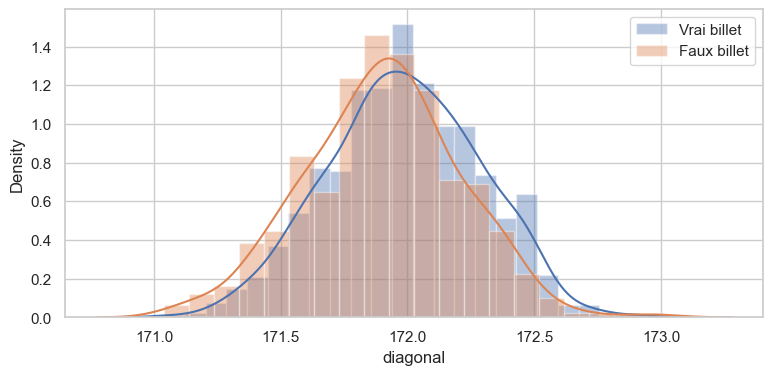

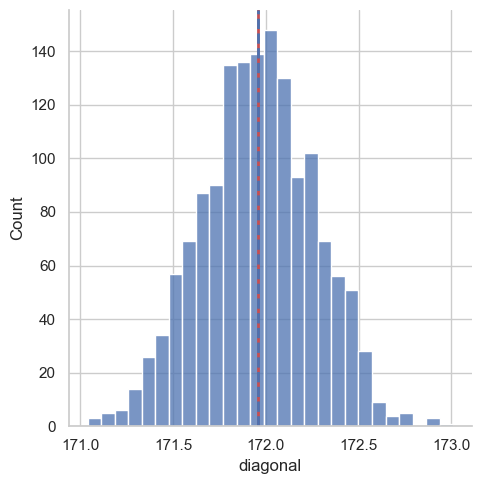

Skewness:  -0.03327338562637491
Kurtosis:  -0.1288643638667306
Kolmogorov-Smirnov: 
 KstestResult(statistic=0.036333333333333336, pvalue=0.4001320550000251)
-------------------------
Height_left


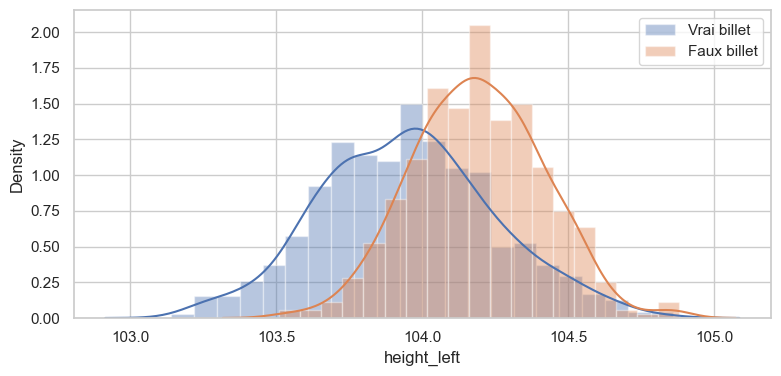

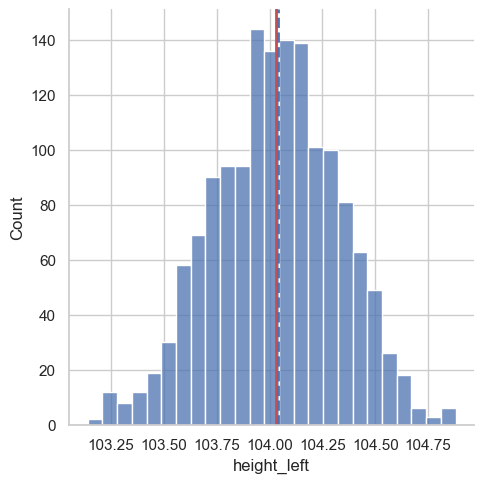

Skewness:  -0.09202848000665637
Kurtosis:  -0.19861842156870724
Kolmogorov-Smirnov: 
 KstestResult(statistic=0.052333333333333336, pvalue=0.07293583163612802)
-------------------------
Height_right


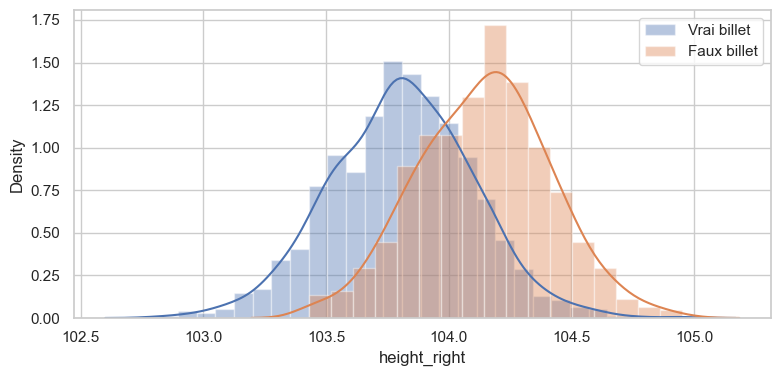

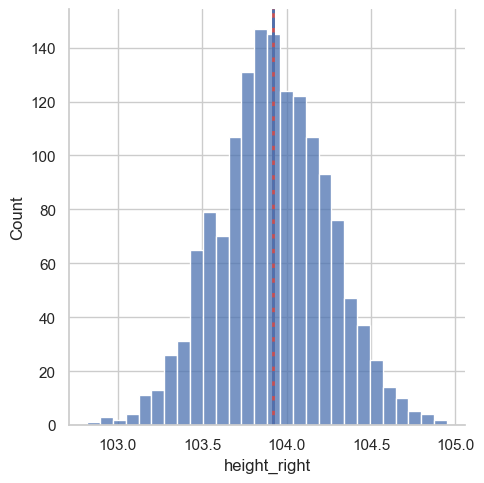

Skewness:  -0.000327219556341104
Kurtosis:  -0.031138318138161925
Kolmogorov-Smirnov: 
 KstestResult(statistic=0.043, pvalue=0.21292189001678022)
-------------------------
Margin_low


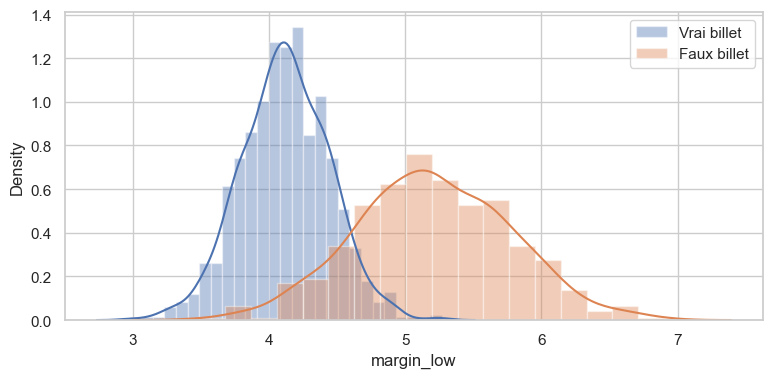

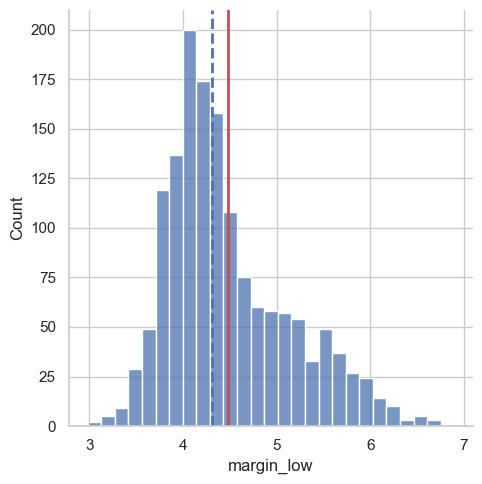

Skewness:  0.873991237277214
Kurtosis:  0.25072495443564335
Kolmogorov-Smirnov: 
 KstestResult(statistic=0.14666666666666667, pvalue=1.056888639380222e-11)
-------------------------
Margin_up


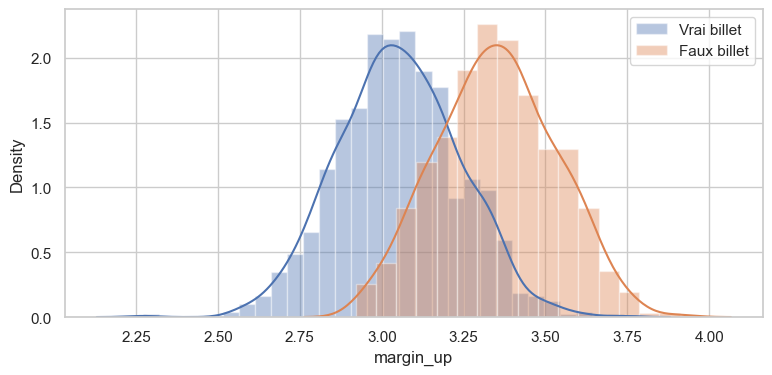

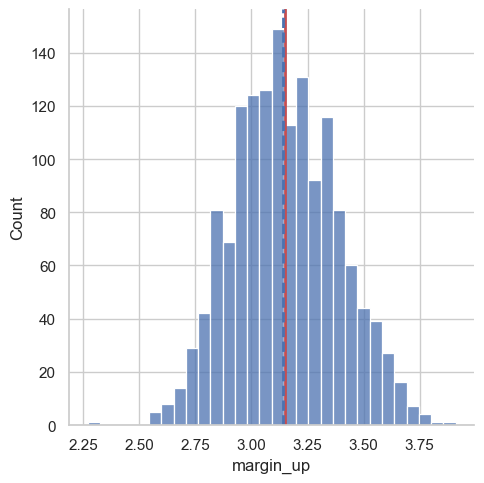

Skewness:  0.1457918478253625
Kurtosis:  -0.248256984444303
Kolmogorov-Smirnov: 
 KstestResult(statistic=0.045, pvalue=0.1723113865004514)
-------------------------
Length


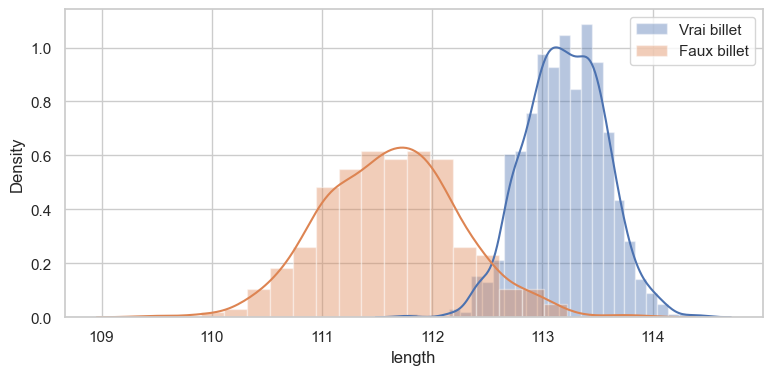

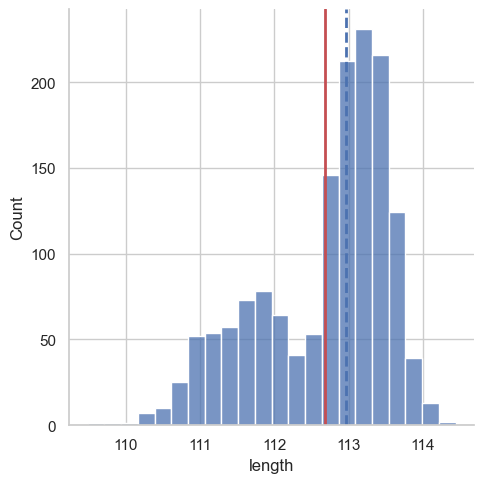

Skewness:  -0.8151403548537486
Kurtosis:  -0.28338839609225497
Kolmogorov-Smirnov: 
 KstestResult(statistic=0.135, pvalue=5.622320676977973e-10)
-------------------------


In [35]:
cols = data[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]


for i in cols:
    distrib_normalize(i)

In [36]:
for i in cols:
    print(i.capitalize())
    X = data['is_genuine'] # qualitative
    Y = data[i] # quantitative
    print('eta-squared :', eta_squared(X,Y))

Diagonal
eta-squared : 0.005874747685460464
Height_left
eta-squared : 0.04809101562368492
Height_right
eta-squared : 0.0784380262942381
Margin_low
eta-squared : 0.199246922503885
Margin_up
eta-squared : 0.1225179758610543
Length
eta-squared : 0.24042813040704275


## Analyse

Analyse:<br><br>
    - skewness : <br>
Highly skewed distribution: If the skewness value is less than −1 or greater than +1.<br>
Moderately skewed distribution: If the skewness value is between −1 and −½ or between +½ and +1.<br>
Approximately symmetric distribution: If the skewness value is between −½ and +½.<br>
<br>
    - Kurtosis is a measure of whether or not a distribution is heavy-tailed or light-tailed relative to a normal distribution.

The kurtosis of a normal distribution is 3.<br>
If a given distribution has a kurtosis less than 3, it is said to be playkurtic, which means it tends to produce fewer and less extreme outliers than the normal distribution.<br>
If a given distribution has a kurtosis greater than 3, it is said to be leptokurtic, which means it tends to produce more outliers than the normal distribution.<br>

<br>
<b>Seulement 2 variables ne vont pas suivre une loi normale : margin_low & length</b><br>

rappel = Les propriétés d'une distribution normale sont : <br>
La fonction de densité de probabilités de la loi normale a la forme d'une courbe en cloche symétrique.<br>
la moyenne et la médiane sont égales ; la courbe est centrée sur la moyenne.

# ACP

L'analyse en composantes principales (ACP ou PCA en anglais) permet de réduire le nombre de dimensions d'un jeu de données décrit par un grand nombre de variables.<br>
Cela permet une visualisation simplifiée et une accélération des calculs.<br>
(alternative analyse factorielle https://ichi.pro/fr/introduction-a-l-analyse-factorielle-en-python-116625965253739)

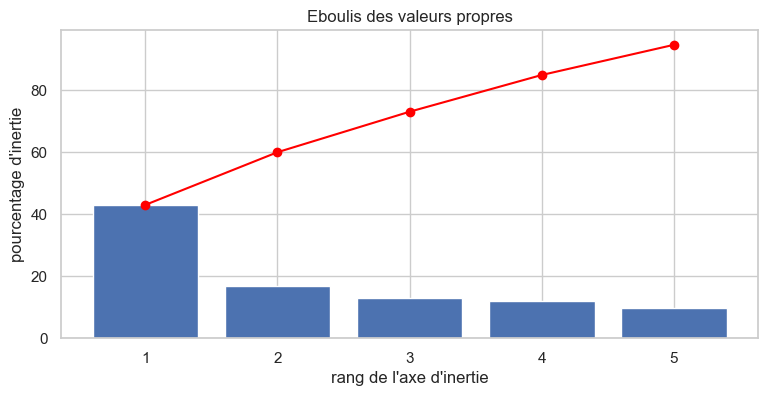

Variance expliquée : 59.9 % 
Variance par composante : [0.42947602 0.16961049]


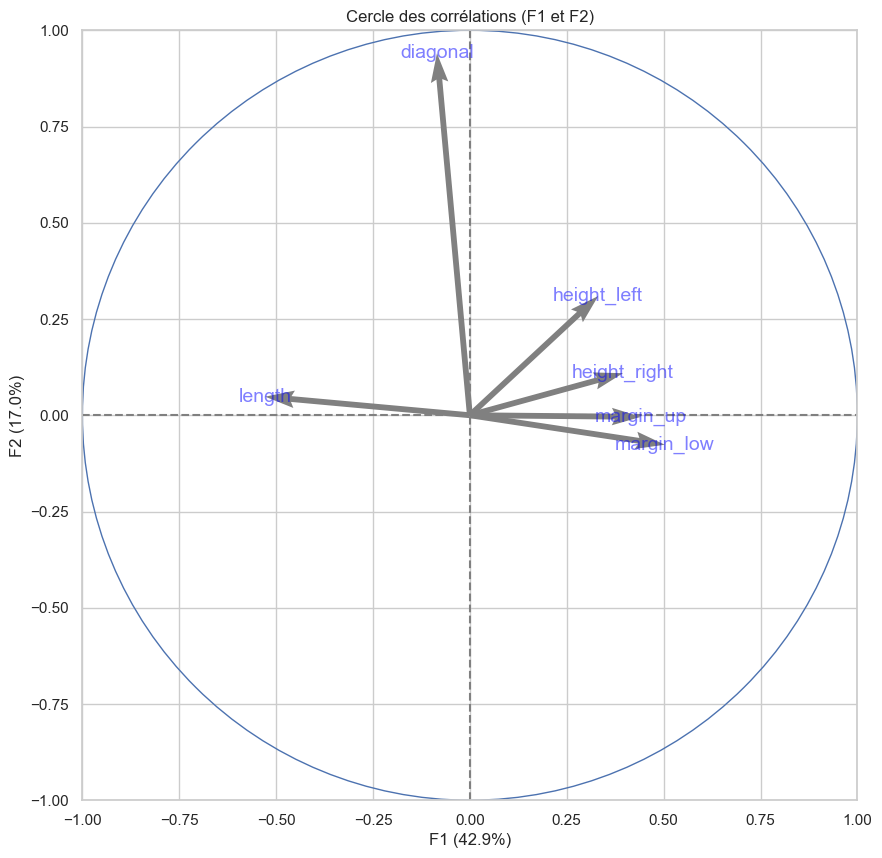

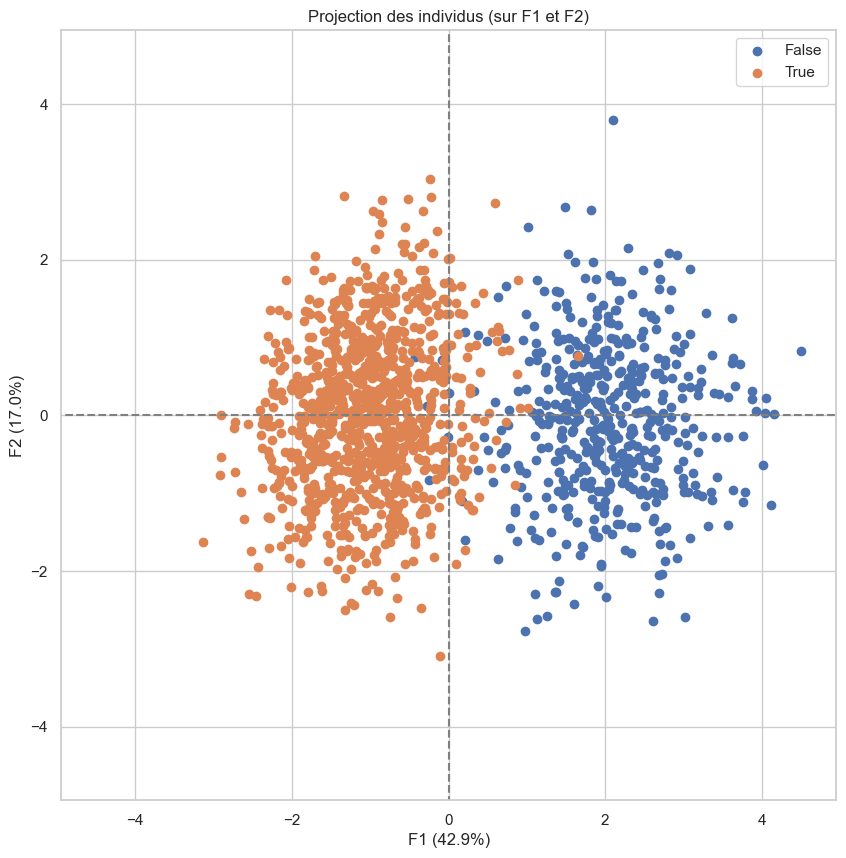

In [37]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

# choix du nombre de composantes à calculer
n_comp = 5

# import de l'échantillon
data_ = data[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']]

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data_[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']]

# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) 
# Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data_.index # ou data.index pour avoir les intitulés
features = data_.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)#ici

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

n_components = 2 # Nombre de composantes
pca = PCA(n_components=n_components).fit(X_scaled)
print(
    'Variance expliquée :', 
    round(sum(pca.explained_variance_ratio_) * 100, 1), '%',
    '\nVariance par composante :', pca.explained_variance_ratio_)


# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)#ici
display_factorial_planes(X_projected, n_comp, pca, [(0,1)],illustrative_var=data['is_genuine'])

plt.show()



On joint les valeurs des composantes à la dataframe principale, pour pouvoir représenter chaque billet sur le plan factoriel<br> (avec la composante 1 en abscisse et la composante 2 en ordonnée). 

In [38]:
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(X_scaled)

for i in range(0, n_components): 
    data['PC' + str(i + 1)] = reduced[:, i]
data

,is_genuine,diagonal,height_left,height_right,margin_up,margin_low,length,PC1,PC2
0,True,171.81,104.86,104.95,2.89,4.52,112.83,1.650380,0.755585
1,True,171.46,103.36,103.66,2.99,3.77,113.09,-2.015551,-2.207904
2,True,172.69,104.48,103.50,2.94,4.40,113.16,-0.971183,2.618968
3,True,171.36,103.91,103.94,3.01,3.62,113.51,-1.369764,-1.812969
4,True,171.73,104.28,103.46,3.48,4.04,112.54,0.156278,-0.561972
...,...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,3.09,4.42,111.28,1.432548,-0.265407
1496,False,172.19,104.63,104.44,3.37,5.27,110.97,3.282646,1.319100
1497,False,171.80,104.01,104.12,3.36,5.51,111.95,1.887196,-0.604781
1498,False,172.06,104.28,104.06,3.46,5.17,112.25,1.790633,0.509786


# K-Means

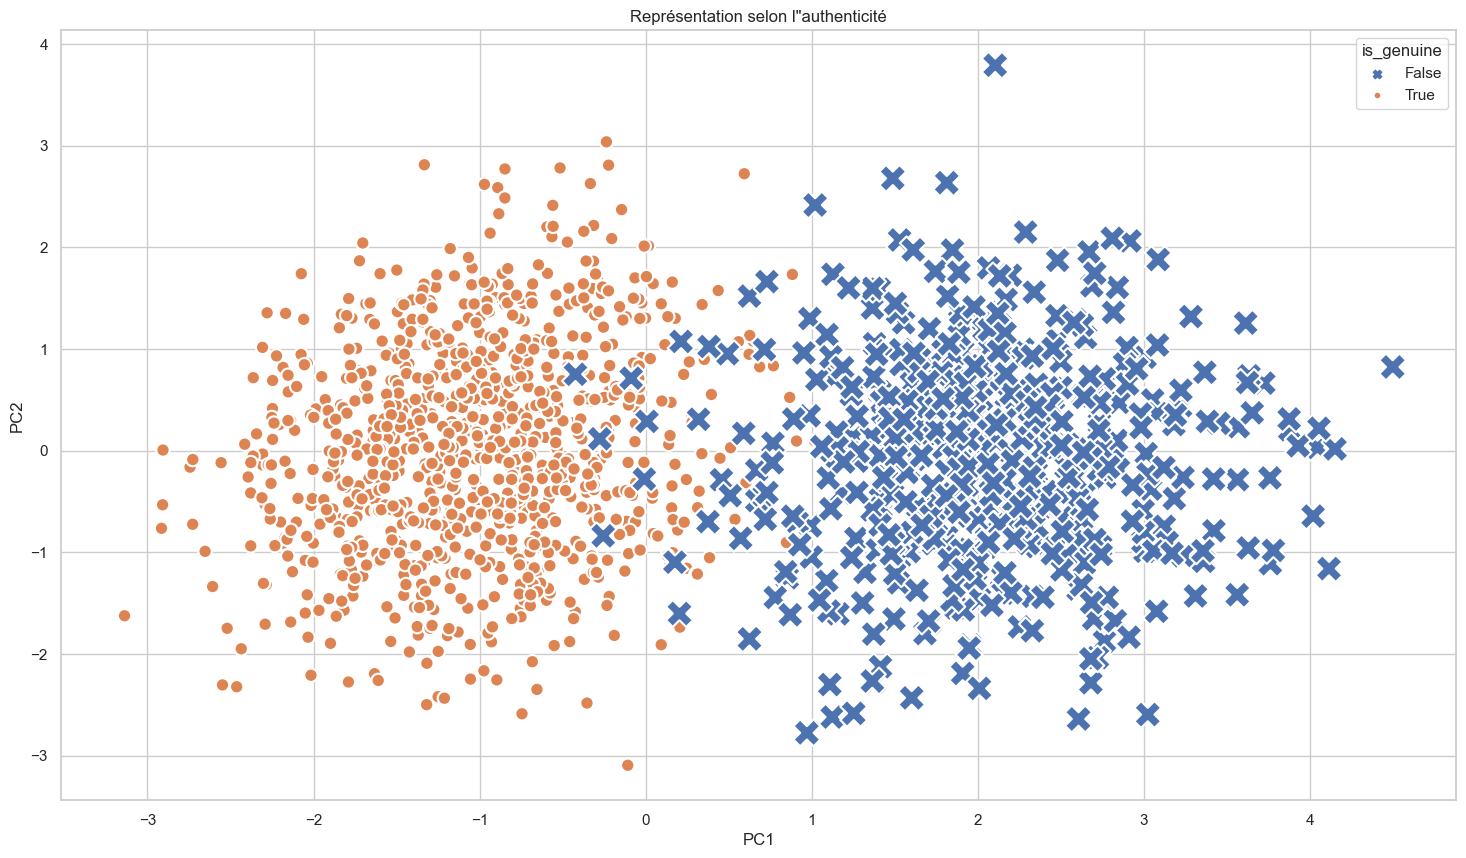

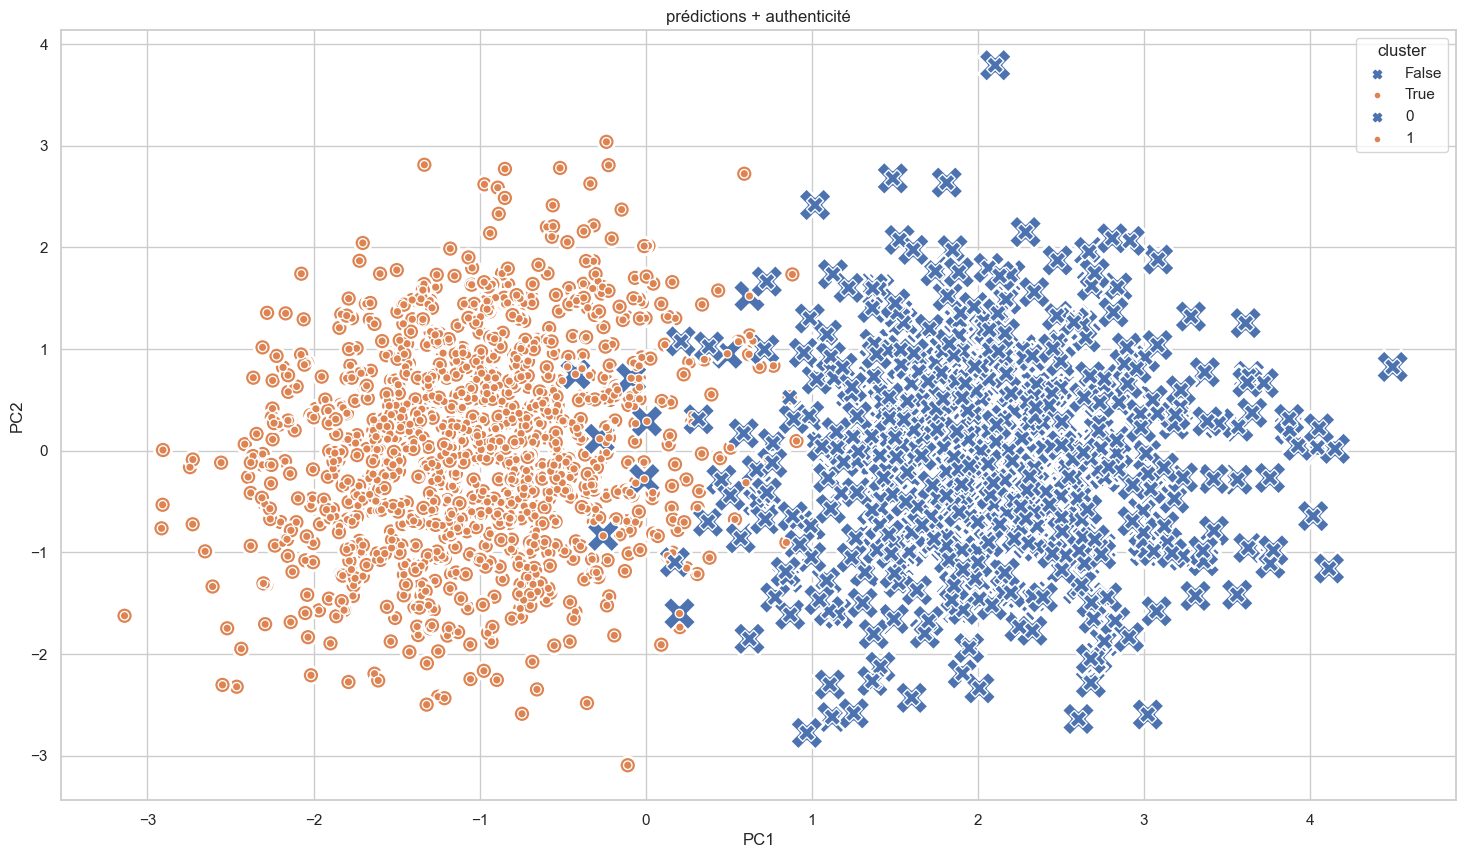

In [39]:
from sklearn.cluster import KMeans

# Nombre de clusters souhaités
n_clust = 2

# import de l'échantillon
data_e =data[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']]

# préparation des données pour le clustering
X = data.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Ajout de la prediction du clustering 
data['cluster']= clusters

# représentation selon l'authenticité du billet

plt.figure(figsize=(18, 10))
scatter_markers = ['X','.']
sns.scatterplot(data=data, x='PC1', y='PC2',
                style='is_genuine', hue='is_genuine', markers=scatter_markers, s=375)
plt.title('Représentation selon l"authenticité')
save_fig('acp_isgenuine')
plt.show()

# Représentation de l'authenticité ainsi que de la prédiction

plt.figure(figsize=(18,10))
scatter_markers = ['X','.']
sns.scatterplot(data=data, x='PC1', y='PC2', markers=scatter_markers,
                style='is_genuine', hue='is_genuine', s=600)
sns.scatterplot(data=data, x='PC1', y='PC2', markers=scatter_markers,
                style='cluster', hue='cluster', s=150)
plt.title('prédictions + authenticité')
save_fig('prediction&authenticité')
plt.show() # Contour = classe réelle ; Point = cluster


In [40]:
data

,is_genuine,diagonal,height_left,height_right,margin_up,margin_low,length,PC1,PC2,cluster
0,True,171.81,104.86,104.95,2.89,4.52,112.83,1.650380,0.755585,0
1,True,171.46,103.36,103.66,2.99,3.77,113.09,-2.015551,-2.207904,1
2,True,172.69,104.48,103.50,2.94,4.40,113.16,-0.971183,2.618968,1
3,True,171.36,103.91,103.94,3.01,3.62,113.51,-1.369764,-1.812969,1
4,True,171.73,104.28,103.46,3.48,4.04,112.54,0.156278,-0.561972,1
...,...,...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,3.09,4.42,111.28,1.432548,-0.265407,0
1496,False,172.19,104.63,104.44,3.37,5.27,110.97,3.282646,1.319100,0
1497,False,171.80,104.01,104.12,3.36,5.51,111.95,1.887196,-0.604781,0
1498,False,172.06,104.28,104.06,3.46,5.17,112.25,1.790633,0.509786,0


Je génère la matrice de confusion, ici je le fais avec la fonction confusion_matrix de la librairie sklearn

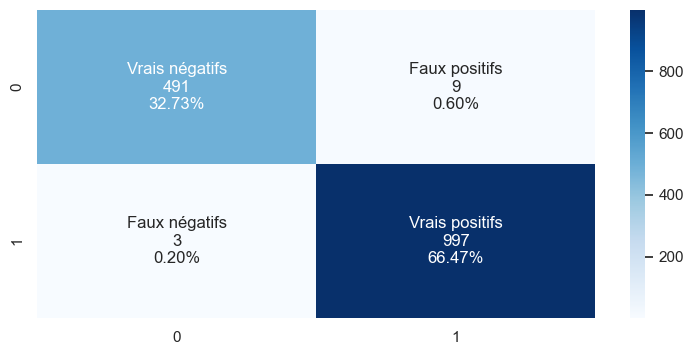

              precision    recall  f1-score   support

       False       0.99      0.98      0.99       500
        True       0.99      1.00      0.99      1000

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



In [41]:
def matrice_confusion(a, b, nom_graphique):
    confusion_matrix = sk.metrics.confusion_matrix(a,b)
    group_names = ['Vrais négatifs','Faux positifs','Faux négatifs','Vrais positifs']
    group_counts = ['{0:0.0f}'.format(value) for value in confusion_matrix.flatten()]
    group_percentages = [
        '{0:.2%}'.format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
    save_fig('matrice_confusion')
    plt.show()
    
    classification = sk.metrics.classification_report(a,b)
    print(classification)
    
matrice_confusion(data['is_genuine'], data['cluster'], 'kmeans_matrice-confusion')


Parmi les 1000 vrais billets :<br>
995 ont été bien placés <br>
5 prédit comme negatif alors qu'ils sont vrais<br>
<br>
Parmi les 500 faux billets :<br>
491 sont biens placés<br>
9 sont prédit comme étant vrais alors qu'ils sont faux en réalité (faux positifs)<br>
<br>

# Modelisation

In [42]:
#On dissocie *is_genuine* (qu'on appelle `y` : la target) des autres variables standardisées (`X`). 
y = data['is_genuine'] # Target
y

0        True
1        True
2        True
3        True
4        True
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Name: is_genuine, Length: 1500, dtype: bool

## split data

X et Y sont divisés en 2 echantillons train et test

In [43]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
    X_scaled, y, test_size=0.20, random_state=42)

print('X_train :', len(X_train), 'lignes',
    '\ny_train :', len(y_train), 'lignes',
    '\nX_test :', len(X_test), 'lignes',
    '\ny_test :', len(y_test), 'lignes')

X_train : 1200 lignes 
y_train : 1200 lignes 
X_test : 300 lignes 
y_test : 300 lignes


## Dummy classifier

DummyClassifier is a classifier that makes predictions using simple rules.<br>
This classifier is useful as a simple baseline to compare with other (real) classifiers.<br>
it makes predictions without trying to find patterns in the data.<br>
The default model essentially looks at what label is most frequent in the training dataset and makes predictions based on that label.

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

In [44]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_biased = DummyClassifier(random_state=0, strategy='uniform')
dummy_biased.fit(X_train, y_train)
y_pred_dummy = dummy_biased.predict(X_test) # Prédiction de la target sur les variables de test (X_test)
#print(y_pred_dummy)
accuracy = accuracy_score(y_test,y_pred_dummy)
print("Accuracy : ", accuracy)

Accuracy :  0.49333333333333335


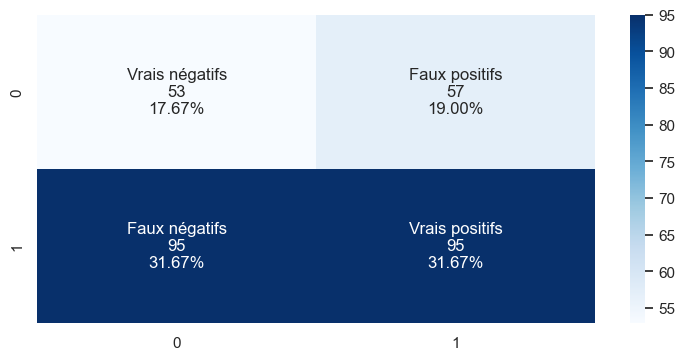

              precision    recall  f1-score   support

       False       0.36      0.48      0.41       110
        True       0.62      0.50      0.56       190

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.48       300
weighted avg       0.53      0.49      0.50       300



In [45]:
matrice_confusion(y_test, y_pred_dummy, 'dummy_matrice-confusion')

## Regression logistique

In [46]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy : ", accuracy)
from sklearn.metrics import classification_report
#print(classification_report(y_test,predictions))

Accuracy :  0.99


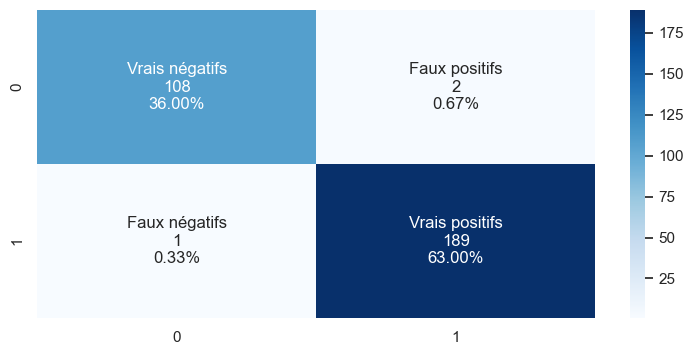

              precision    recall  f1-score   support

       False       0.99      0.98      0.99       110
        True       0.99      0.99      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [47]:
matrice_confusion(y_test, predictions, 'reglog_matrice-confusion')

Parmi les 190 vrais billets :<br>
190 ont été bien placés <br>
<br>
Parmi les 110 faux billets :<br>
107 sont biens placés<br>
3 sont prédit comme étant vrais alors qu'ils sont faux en réalité (faux positifs)<br>
<br>

## Sauvegarde de l'algorithme

https://www.quennec.fr/trucs-astuces/langages/python/python-le-module-pickle<br>
si pour une raison quelconque, dans un script Python, vous avez besoin de sauvegarder, temporairement ou même de façon plus pérenne, <br>
le contenu d'un objet Python comme une liste, un dictionnaire, un tuple etc etc ... au lieu d'utiliser une base de données ou un simple fichier texte,<br>
le module pickle est fait pour ça.

In [49]:
#Sauvegarde du modèle lr 
import pickle
with open('model.pkl', 'wb') as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(lr)

# Algorithme de détection

Pour chaque billet, l'algorithme de classification donnera la probabilité que le billet soit vrai.<br> Si cette probabilité est supérieure ou égale à 0.5, le billet sera considéré comme vrai. <br>Dans le cas contraire, il sera considéré comme faux

In [50]:
#Fonction "detection_billet()" à utiliser dans l'étape suivante

def detection_billet(nom_fichier):
    """ Programme de détection de faux billets à partir d'un fichier .csv
    """
    
    # Chargement et préparation des données 
    df = pd.read_csv(nom_fichier)
    X = df.copy()
    X = X.iloc[:, :-1]
    
    # Centrage/réduction des données (éviter les écarts d'échelle, les données prendront toutes la même importance)
    std_scale = preprocessing.StandardScaler().fit(X)
    X_scaled = std_scale.transform(X)
    
    # Récupération du modèle de Régression Logistique 'lr'
    with open('/Users/ismaelh/Data Analyst/DA/Projet 10/model.pkl', 'rb') as f:
        my_unpickler = pickle.Unpickler(f)
        lr = my_unpickler.load()
    
    # Utilisation du modèle de prédiction 'lr'
    probability = lr.predict_proba(X_scaled)[:, 1]
    
    # Probabilités des billets établies 
    proba = pd.Series(probability.round(3), name="Probabilité d'authenticité (%)")
    
    # Intégration des probabilités dans le jeu de données
    df_final = pd.concat([df, proba], axis=1)
    
    # Résultats de la classification prédictive, selon une probabilité  supérieure ou égale à 0.5 :
    resultat = []
    for i in df_final["Probabilité d'authenticité (%)"] >= .5:
        if i is True :
            resultat.append('Vrai Billet')
        else :
            resultat.append('Faux Billet')
            

    df_final['resultat'] = resultat
    


    return df_final

In [54]:
echantillon = detection_billet('billets.csv', sep ';')
echantillon

SyntaxError: invalid syntax (2365757623.py, line 1)

In [ ]:
liste_faux_billets = list(echantillon.loc[(echantillon["resultat"] == "Faux Billet"),"id"].values)
print(echantillon['resultat'].value_counts())
print("Les billets dont l'identifiant est dans la liste", liste_faux_billets, 
      "\nont été identifiés commes FAUX selon l'algorithme de prédiction.")